In [41]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image,ImageFilter
import PIL 

In [3]:
image = cv2.imread('panda.jpg')

In [4]:
SIFT = cv2.xfeatures2d.SIFT_create()


In [10]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [5]:
keypoints,descriptor = SIFT.detectAndCompute(image,None)

In [11]:
img = cv2.drawKeypoints(gray,keypoints,image)


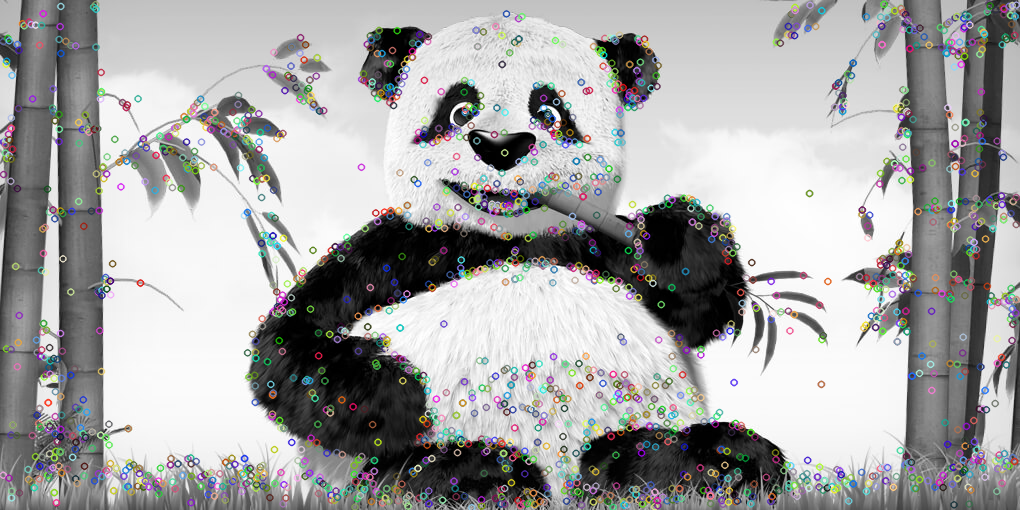

In [14]:

cv2_imshow(img)

In [18]:

# creating a image object (main image) 
im1 = Image.open("/content/panda.jpg") 
  
# save a image using extension
im1 = im1.save("shiftpanda.jpg")

##Task no 2

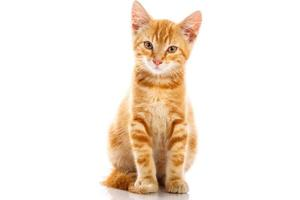

In [22]:
img2 = cv2.imread('cat.jpg')
cv2_imshow(img2)

In [27]:
rotated90_image = cv2.rotate(img2,cv2.ROTATE_90_CLOCKWISE)

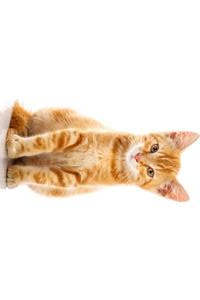

In [28]:
cv2_imshow(rotated90_image)

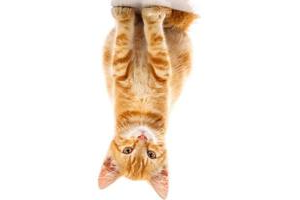

In [29]:
rotated180_image = cv2.rotate(img2,cv2.ROTATE_180)
cv2_imshow(rotated180_image)

In [30]:
keypoints1,descriptor1 = SIFT.detectAndCompute(img2,None)
keypoints2,descriptor2 = SIFT.detectAndCompute(rotated90_image,None)
keypoints3,descriptor3 = SIFT.detectAndCompute(rotated180_image,None)

In [37]:
len(keypoints1),len(keypoints2),len(keypoints3)

(242, 240, 239)

In [32]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)


In [38]:
matches = bf.match(descriptor1,descriptor3)
matches = sorted(matches, key = lambda x:x.distance)

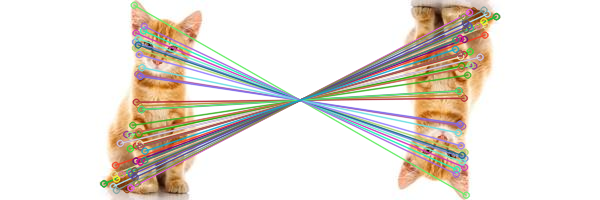

In [39]:
img3 = cv2.drawMatches(img2, keypoints1, rotated180_image, keypoints3, matches[:50], rotated180_image, flags=2)
cv2_imshow(img3)

TASK NO 3

In [62]:
initial_img = cv2.imread('panda.jpg')


In [64]:

dst = cv2.GaussianBlur(initial_img,(5,5),cv2.BORDER_DEFAULT) 

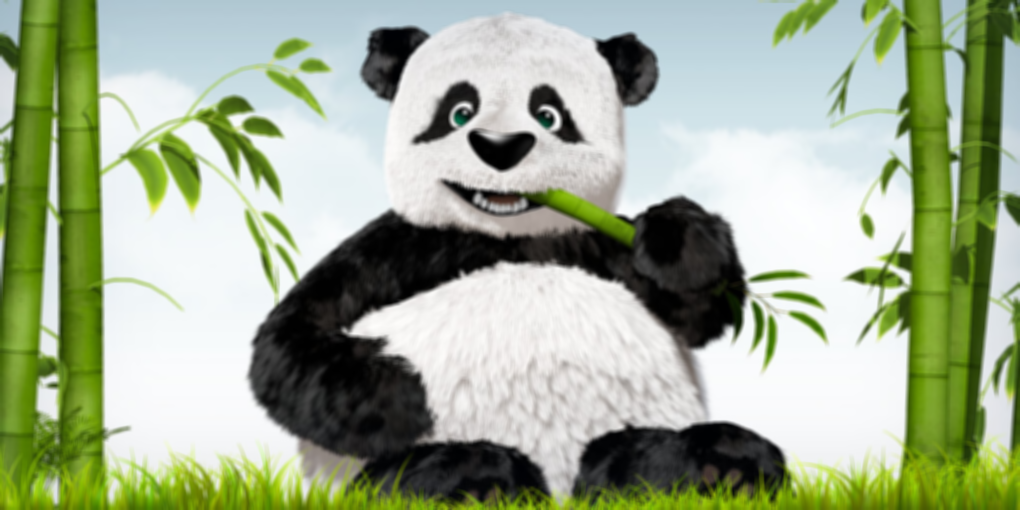

In [57]:
cv2_imshow(dst)

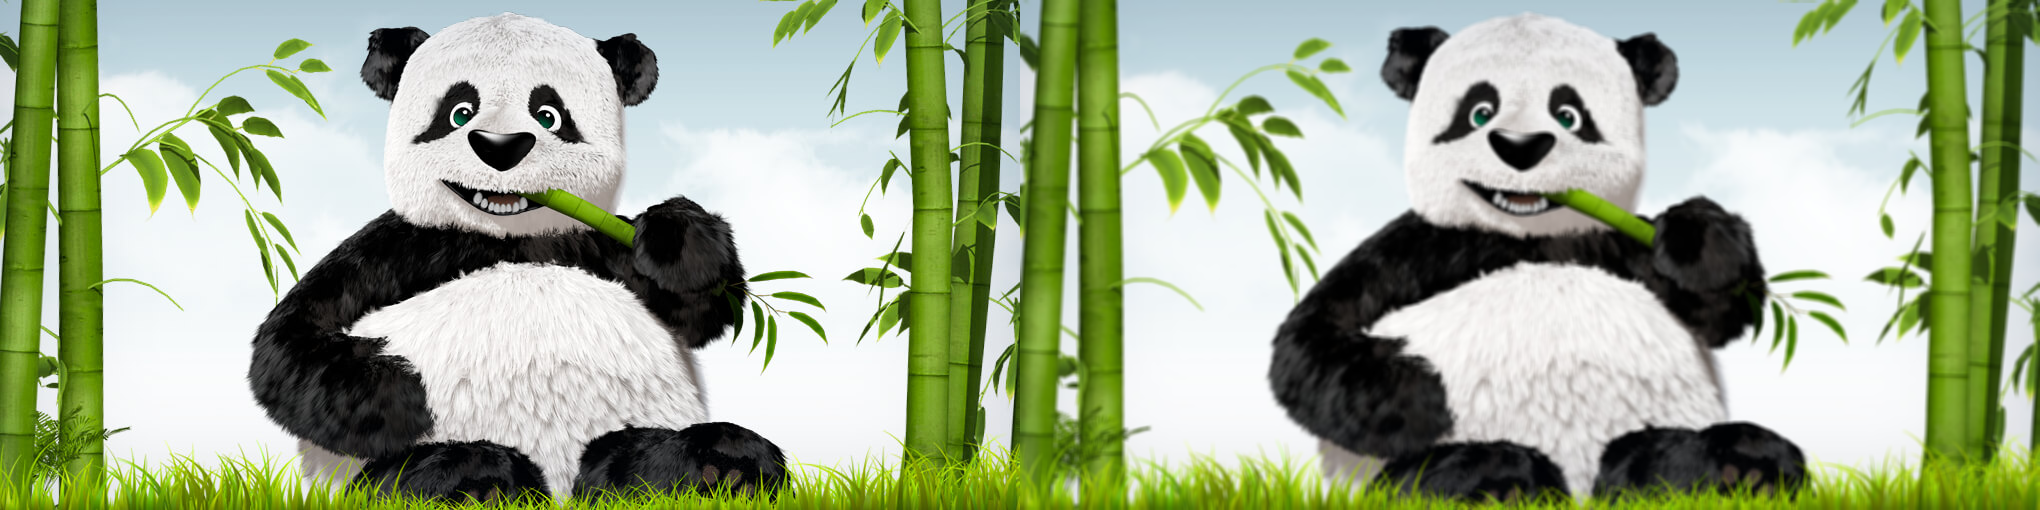

-1

In [60]:
cv2_imshow(np.hstack((initial_img, dst)))
cv2.waitKey(0);
cv2.destroyAllWindows();
cv2.waitKey(1)

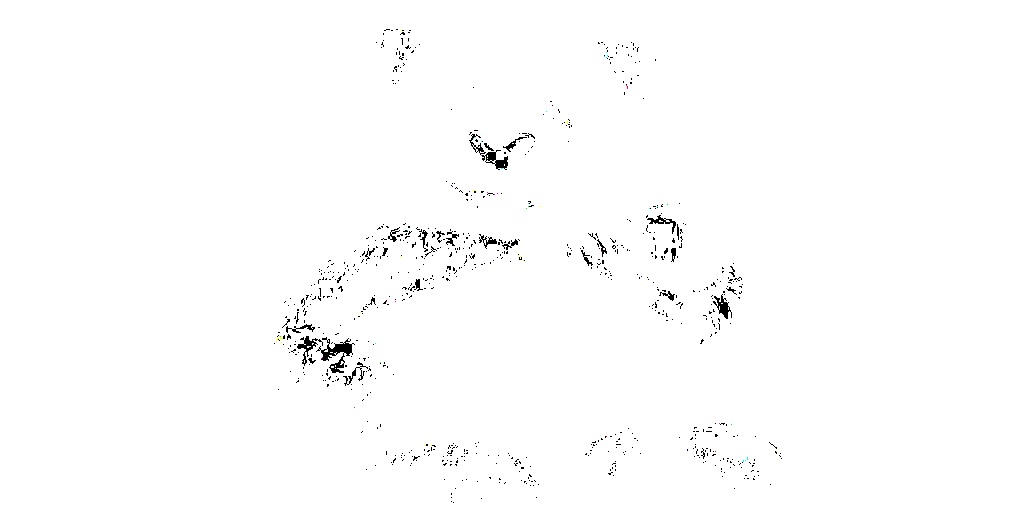

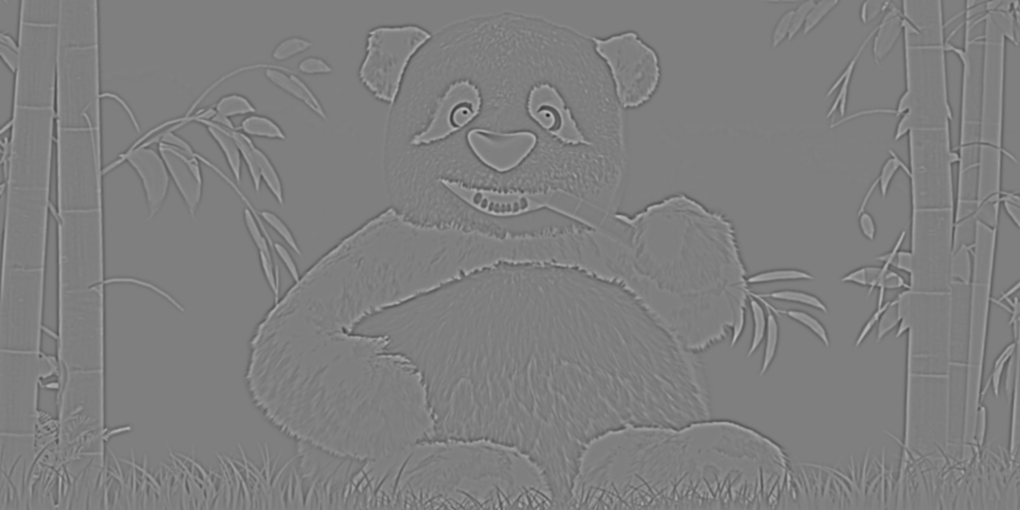

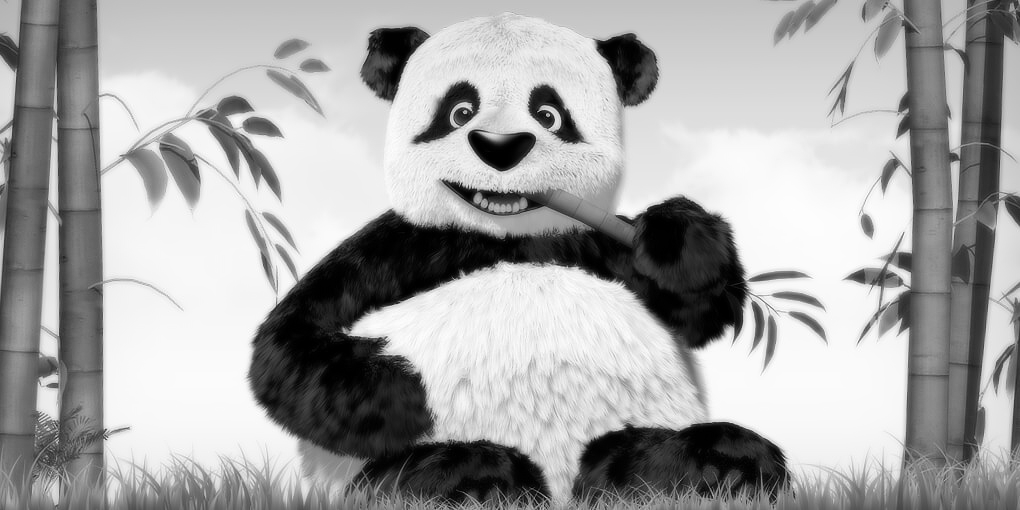

In [73]:
import cv2

img_p = cv2.imread('panda.jpg', cv2.IMREAD_GRAYSCALE).astype('float32') / 255.0

# gamma correction
img_gamma = img**0.2
img_gamma = (255.0 * img_gamma).clip(0,255).astype('uint8')

# DOG
blur1 = cv2.GaussianBlur(img_p, (0,0), 1, borderType=cv2.BORDER_REPLICATE)
blur2 = cv2.GaussianBlur(img_p, (0,0), 2, borderType=cv2.BORDER_REPLICATE)
# compute difference and bias to 0.5
img_dog1 = blur2 - blur1 + 0.5
img_dog1 = (255.0 * img_dog1).clip(0,255).astype('uint8')
# Or compute difference and add back to image as band pass boost filter
img_dog2 = blur2 - blur1 + img_p
img_dog2 = (255.0 * img_dog2).clip(0,255).astype('uint8')

# show results

cv2_imshow(img_gamma)
cv2_imshow(img_dog1)
cv2_imshow(img_dog2)
cv2.waitKey(0)
cv2.destroyAllWindows()